The random.random() method returns a random float number between 0.0 to 1.0. The function doesn't need any arguments.

In [1]:
import random
import math
import time
random.seed(42)

random.random()

0.6394267984578837

Generate 2D coords in the range -1, 1

In [2]:
# Generate 2D coords in the range -1, 1
def generate_coords():
    x, y = 2 * random.random() - 1, 2 * random.random() - 1
    return (x,y)

In [3]:
generate_coords()

(-0.9499784895546661, -0.4499413632617615)

Understand if it is in circle with radius 1

In [4]:
def is_in_circle(point2D):
    x, y = point2D
    if math.sqrt(x**2 + y**2) < 1:
        return True
    return False

In [5]:
p = generate_coords()
print(p)
is_in_circle(p)

(-0.5535785237023545, 0.4729424283280248)


True

In [6]:
n = 5_000_000

in_circle_counter = 0
for i in range(n):
    p = generate_coords()
    in_circle_counter += is_in_circle(p)
print('Pi: ', 4 * in_circle_counter/n)

Pi:  3.1411136


In [7]:
print('Error: ', math.pi - (4 * in_circle_counter/n))

Error:  0.00047905358979294377


# Compute `Emprically` pi in single Core

![](https://static.scientificamerican.com/sciam/cache/file/136B824E-D306-4855-AF5EC22E68ACC4D8_source.jpg?w=590&h=800&CEE1411F-7C0D-4FEA-811DBC984C27839D)

In [8]:
# Generate 2D coords in the range -1, 1
def generate_coords():
    x, y = 2 * random.random() - 1, 2 * random.random() - 1
    return (x,y)

#Understand if it is in circle with radius 1
def is_in_circle(point2D):
    x, y = point2D
    if math.sqrt(x**2 + y**2) < 1:
        return True
    return False

def pi_computer(n):
    in_circle_counter = 0
    for i in range(n):
        p = generate_coords()
        in_circle_counter += is_in_circle(p)
    return 4 * in_circle_counter/n

In [9]:
n = 20_000_000

start_time = time.time()
pi_value = pi_computer(n)
duration = time.time() - start_time

print(f"Duration {duration} seconds")
print(f"After Computation the value of Pi {pi_value}")

Duration 29.773674964904785 seconds
After Computation the value of Pi 3.1414258


In [10]:
print('Error: ', math.pi - pi_value)

Error:  0.0001668535897931811


# Compute `Emprically` pi in Multiple Cores

![](https://static.scientificamerican.com/sciam/cache/file/136B824E-D306-4855-AF5EC22E68ACC4D8_source.jpg?w=590&h=800&CEE1411F-7C0D-4FEA-811DBC984C27839D)

In [11]:
import multiprocessing
import multi_process_example as mpe

def find_pi(n):
    with multiprocessing.Pool() as pool:
        values = pool.map(mpe.pi_computer, n)
    return values

n = 20_000_000
k = 4
numbers = [n] * k

start_time = time.time()
values = find_pi(numbers)
duration = time.time() - start_time
print(f"Duration {duration} seconds")

Duration 28.801045894622803 seconds


In [12]:
numbers

[20000000, 20000000, 20000000, 20000000]

In [13]:
values

[3.140853, 3.1415598, 3.1419842, 3.1415234]

In [14]:
sum(values)/k

3.1414801

In [15]:
print(f"Duration {duration} seconds")
print(f"After Computation the value of Pi {sum(values)/k}")

Duration 28.801045894622803 seconds
After Computation the value of Pi 3.1414801


In [16]:
math.pi

3.141592653589793

In [17]:
print('Error: ', math.pi - sum(values)/k)

Error:  0.00011255358979322949


# Error Analysis

In [25]:
pi_values = []
durations = []
for i in range(1,100):
    n = i * 10000
    start_time = time.time()
    pi_value = pi_computer(n)
    duration = time.time() - start_time
    
    pi_values.append(pi_value)
    durations.append(duration)

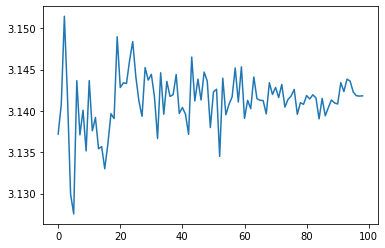

In [26]:
import matplotlib.pyplot as plt

plt.plot(pi_values)

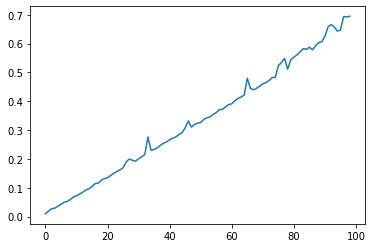

In [27]:
plt.plot(durations)